Image Segmentation Using KMeans

1) Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

2. Define Euclidean Distance

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

3. Build KMeans Algorithm class and its methods/functions

In [3]:
class KMeans():
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()
    def cent(self):
        return self.centroids


4. Import Image

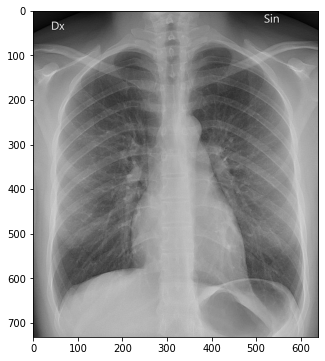

In [4]:
import cv2

image = cv2.imread("640px-Normal_posteroanterior_(PA)_chest_radiograph_(X-ray).jpg")
plt.figure(figsize=(6, 6))
plt.imshow(image)

5. Convert image BGR to Grayscale

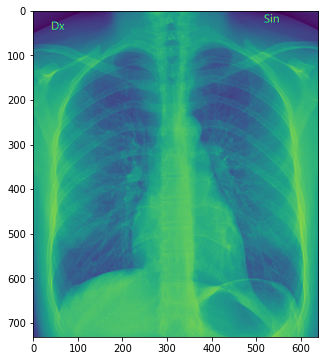

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6)) 
plt.imshow(image)

6. Now we have to prepare the data for K means. The image is a 3-dimensional shape but to apply k-means clustering on it we need to reshape it to a 2-dimensional array.

In [6]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(156160, 3)


7. Train and predict the centroids

In [8]:
k = KMeans(K=8, max_iters=100)  
y_pred = k.predict(pixel_values) 
k.cent()

array([[ 24.89880562,  24.84907913,  25.14942741],
       [108.6894989 , 108.73213196, 108.8379364 ],
       [146.61395264, 146.647995  , 146.61964417],
       [ 66.2531662 ,  65.77164459,  66.32881927],
       [128.09870911, 128.16783142, 128.11331177],
       [164.39677429, 164.46458435, 164.31770325],
       [ 88.2837677 ,  87.92063141,  88.09840393],
       [183.39582825, 183.67732239, 183.40472412]])

8. convert data into 8-bit values

In [9]:
centers = np.uint8(k.cent())
centers

array([[ 24,  24,  25],
       [108, 108, 108],
       [146, 146, 146],
       [ 66,  65,  66],
       [128, 128, 128],
       [164, 164, 164],
       [ 88,  87,  88],
       [183, 183, 183]], dtype=uint8)

In [10]:
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [11]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

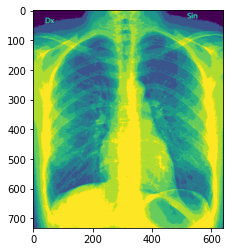

In [12]:
plt.imshow(segmented_image)
plt.show()